<a href="https://colab.research.google.com/github/ssuzana/Data-Structures-and-Algorithms-Notebooks/blob/main/08_Heaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Priority Queues**

A *priority queue* is a list whose deletions and access are just like a classic queue, but whose insertions are like an ordered array. That is, we only delete and access data from the front of the priority queue, but when we insert data, we always make sure the data remains sorted in a specific order.

Example of where a priority queue is helpful is an application that manages the triage system for a hospital emergency room.

#**Heaps**

A *heap* is a type of tree data structure. It is useful when we want to constantly keep track tabs on the greatest or least data element in a dataset.

There are several types of heaps, but we're going to focus on the *binary heap*.

The binary heap is a specific kind of binary tree and it can be classified into two types: the *max-heap* and the *min-heap*. We're going to work with the max-heap for now and refer to this data structure simply as a heap. So from now on, **heap = binary max-heap**.

The heap is a **binary tree** that maintains the following conditions:

* **The heap condition**: the value of each node must be greater than each of its descendant nodes. The root, therefore, is the maximum element of the tree.

* The tree must be **complete** (i.e. completely filled with nodes other than the rightmost elements on the last level). Completeness is important because we want to ensure our heap remains *well-balanced*.

The heap has two primary operations: **inserting** and **deleting**. Searching within a heap would require us to inspect each node, so search is not an operation usually implemented in the context of heaps.

The heap has something called a **last node**. A heap's last node is the rightmost node in its bottom level.

#**Heap Insertion** $O(\log N)$

1. We create a node containing the new value and insert it at the next available rightmost spot in the bottom level. Thus, this value becomes the heaps last node.

2. Next, we compare this new node with its parent node.

3. If the new node is greater than its parent node, we swap the new node with the parent node.

4. We repeat Step 3, effectively moving the new node up through the heap (called *trickling* the node), until it has a parent whose value is greater than it.

The efficiency of inserting a node in a heap is $O(\log N)$.

 For $N$ nodes in any binary tree, the tree is organized into about $\log(N)$ rows/levels. Since at most we'd have to trickle the new value up to the top row, this will take $\log(N)$ steps at most.


#**Heap Deletion** $O(\log N)$ 
## In a heap we only delete the root node.

1. Move the last node into where the root node was, effectively removing the original root node.

2. Trickle the root node (the "trickle node")  **down** into its proper place:
<ol type="a">
  <li> We check both children of the trickle node and see which one is larger.</li>
  <li> If the trickle node is smaller than the larger of the two child nodes, we swap the trickle node with that larger child.
  <li> We repeat steps a and b until the trickle node has no children who are greater than it.</li>
</ol>

#**Looking for the Last Node**

The first step of the insertion algorithm has us place the new value as the heap's last node. Also, the first step of the deletion algorithm requires us to move the last node and turn it into the root node.
But how do we find the spot that will be the last node?

**An array is used to store the values of a heap**. The root node is always stored at index 0. We then move down a level and go fro  left to right, assigning each node to the next available index in the array. We then reach the end of a level, we move down to the next level and repeat this pattern. When we implement the heap in this fashion, the *last node will always be the final element of the array*.

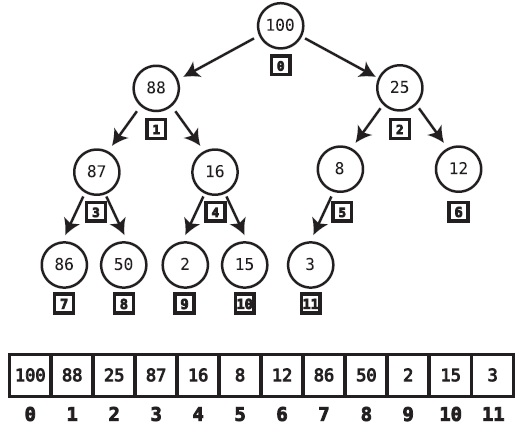








#**Traversing an Array-Based Heap**

When we assign the indexes of the heap's nodes according to the pattern described earlier, the following traits of a heap are always true:
* To find the **left child** of any node, we can use the formula `(index * 2) + 1`
* To find the **right child** of any node, we can use the formula `(index * 2) + 2`
* To find a node's **parent**, we can use the formula `(index - 1) // 2` (integer division)

In [ ]:
class Heap:
  def __init__(self):
    self.data = []

  def rootNode(self):
    return self.data[0]

  def lastNode(self):
    return self.data[-1]    

  def leftChildIndex(self, index):
    return  (index * 2) + 1

  def rightChildIndex(self, index):
    return (index * 2) + 2  

  def ParentIndex(self, index):
    return (index - 1) // 2  

  def insert(self, value):
    self.data.append(value)
    new_idx = len(self.data) - 1
    # "trickle up" the new node
    while new_idx > 0 and self.data[new_idx] > self.data[self.ParentIndex(new_idx)]:
      # swap the new node with the parent node
      self.data[self.ParentIndex(new_idx)], self.data[new_idx]  = self.data[new_idx], self.data[self.ParentIndex(new_idx)]
    
      # update the index of the new node
      new_idx = self.ParentIndex(new_idx)

  Heap Deletion - uses two helper methods `has_greater_child` and `calculate_larger_child_index`:

In [ ]:
def delete(self):
  # pop the last node from the array and make it the root node
  self.data[0] = self.data.pop()
  trickle_node_idx = 0
   # "trickle down" the trickle (root) node
  while self.has_greater_child(trickle_node_idx):
    larger_child_idx = self.calculate_larger_child_idx(trickle_node_idx)

    # swap the trickle node with its larger child:
    self.data[trickle_node_idx], self.data[larger_child_idx] =\
    self.data[larger_child_idx], self.data[trickle_node_idx]
    
    # update the trickle's node index
    trickle_node_idx = larger_child_idx

def has_greater_child(self, index):
  # check whether the node at index has left and right children
  # and if either of those children are greater
  (self.data[self.leftChildIndex(index)] and self.data[self.leftChildIndex(index)] > self.data[index])\
  or (self.data[self.rightChildIndex(index)] and self.data[self.rightChildIndex(index)] > self.data[index])

def calculate_larger_child_idx(self, index):
  if not self.data[self.rightChildIndex(index)]:
    return self.leftChildIndex(index)

  if self.data[self.rightChildIndex(index)] > self.data[self.leftChildIndex(index)]:
    return self.rightChildIndex(index)
  else:
    return self.leftChildIndex(index)     

#**[`heapq`](https://docs.python.org/3/library/heapq.html#module-heapq) — Heap queue algorithm**

This module provides an implementation of the heap queue algorithm, also known as the priority queue algorithm.

Heaps are binary trees for which every parent node has a value less than or equal to any of its children. This implementation uses arrays for which `heap[k] <= heap[2*k+1]` and `heap[k] <= heap[2*k+2]` for all `k`, counting elements from zero. For the sake of comparison, non-existing elements are considered to be infinite. The interesting property of a heap is that its **smallest element is always the root**, heap[0].

* `heapq.heapify(x)`
Transform list x into a heap, in-place, in linear time.

* `heapq.heappush(heap, item)`
Push the value item onto the heap, maintaining the heap invariant.

* `heapq.heappop(heap)`
Pop and return the smallest item from the heap, maintaining the heap invariant. If the heap is empty, `IndexError` is raised. To access the smallest item without popping it, use `heap[0]`.

* `heapq.heappushpop(heap, item)`
Push item on the heap, then pop and return the smallest item from the heap. 

* `heapq.heapreplace(heap, item)`
Pop and return the smallest item from the heap, and also push the new item. The heap size doesn’t change. If the heap is empty, `IndexError` is raised.


#**703. Kth Largest Element in a Stream** `Easy`

Design a class to find the `k`th largest element in a stream. Note that it is the `k`th largest element in the sorted order, not the `k`th distinct element.

Implement `KthLargest` class:

* `KthLargest(int k, int[] nums)` Initializes the object with the integer `k` and the stream of integers nums.
* `int add(int val)` Appends the integer val to the stream and returns the element representing the `k`th largest element in the stream.

In [ ]:
import heapq 

class KthLargest:

    def __init__(self, k, nums):
        self.nums = nums
        self.k = k
        heapq.heapify(self.nums)
        while len(self.nums) > self.k:
            heapq.heappop(self.nums)

    def add(self, val: int) -> int:
        
        heapq.heappush(self.nums, val)
        if len(self.nums) > self.k:
            heapq.heappop(self.nums)
        return self.nums[0]
    

In [ ]:
kthLargest = KthLargest(3, [4, 5, 8, 2])
print(kthLargest.add(3)) # return 4
print(kthLargest.add(5)) # return 5
print(kthLargest.add(10)) # return 5
print(kthLargest.add(9)) # return 8
print(kthLargest.add(4)) # return 8

4
5
5
8
8


#**Leetcode 1046. Last Stone Weight** `Easy`

You are given an array of integers `stones` where `stones[i]` is the weight of the `i`th stone.

We are playing a game with the stones. On each turn, we choose the heaviest two stones and smash them together. Suppose the heaviest two stones have weights `x` and `y` with `x <= y`. The result of this smash is:

* If `x == y`, both stones are destroyed, and

* If `x != y`, the stone of weight `x` is destroyed, and the stone of weight y has new weight `y - x`.
At the end of the game, there is at most one stone left.

Return the smallest possible weight of the left stone. If there are no stones left, return `0`.

``` 
Example 1:
Input: stones = [2,7,4,1,8,1]
Output: 1
Explanation: 
We combine 7 and 8 to get 1 so the array converts to [2,4,1,1,1] then,
we combine 2 and 4 to get 2 so the array converts to [2,1,1,1] then,
we combine 2 and 1 to get 1 so the array converts to [1,1,1] then,
we combine 1 and 1 to get 0 so the array converts to [1] then that's the value of the last stone.

Example 2:
Input: stones = [1]
Output: 1
 
Constraints:

1 <= stones.length <= 30
1 <= stones[i] <= 1000
```

In [ ]:
import heapq

from typing import List

def lastStoneWeight(stones: List[int]) -> int:

  stones = [-s for s in stones]
  heapq.heapify(stones)

  while len(stones) > 1:
    first =  heapq.heappop(stones)
    second = heapq.heappop(stones)
    if first < second:
      heapq.heappush(stones, first - second)

  if stones:
    return -stones[0]
  else:
    return 0    

In [ ]:
stones = [2,7,4,1,8,1]
lastStoneWeight(stones)

1

#**Leetcode 215. Kth Largest Element in an Array** `Medium`

Given an integer array `nums` and an integer `k`, return the `k`th largest element in the array.

Note that it is the `k`th largest element in the sorted order, not the `k`th distinct element.

 
```
Example 1:
Input: nums = [3,2,1,5,6,4], k = 2
Output: 5

Example 2:
Input: nums = [3,2,3,1,2,4,5,5,6], k = 4
Output: 4

Constraints:

1 <= k <= nums.length <= 104
-104 <= nums[i] <= 104
```

In [ ]:
from typing import List
import heapq

def findKthLargest(nums: List[int], k: int) -> int:

  heap = []

  for num in nums:
    heapq.heappush(heap,num)
    if len(heap) > k:
      heapq.heappop(heap)

  return heap[0]    


In [ ]:
nums = [3,2,1,5,6,4]
k = 2
findKthLargest(nums, k)

5

#**Leetcode 973. K Closest Points to Origin** `Medium`

Given an array of points where `points[i] = [xi, yi]` represents a point on the `X-Y` plane and an integer `k`, return the `k` closest points to the origin `(0, 0)`.

The distance between two points on the `X-Y` plane is the Euclidean distance (i.e., `√(x1 - x2)2 + (y1 - y2)2)`.

You may return the answer in any order. The answer is guaranteed to be unique (except for the order that it is in).

```
Example 1:
Input: points = [[1,3],[-2,2]], k = 1
Output: [[-2,2]]

Example 2:
Input: points = [[3,3],[5,-1],[-2,4]], k = 2
Output: [[3,3],[-2,4]]
 
Constraints:
1 <= k <= points.length <= 104
-104 < xi, yi < 104
```

In [ ]:
import heapq
from typing import List

def kClosest(points: List[List[int]], k: int) -> List[List[int]]:
        minHeap = []
    
        for [x,y] in points:
            heapq.heappush(minHeap, (-(x**2+y**2),[x,y]))
            if len(minHeap) > k:
                heapq.heappop(minHeap)
                
        res = [t[1] for t in minHeap]    
        
        return res 
        

In [ ]:
points = [[3,3],[5,-1],[-2,4]]
k = 2
kClosest(points, k)

[[-2, 4], [3, 3]]